<a href="https://colab.research.google.com/github/cbrumm/deep-learning-with-python-book/blob/main/Chapter_3_linear_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

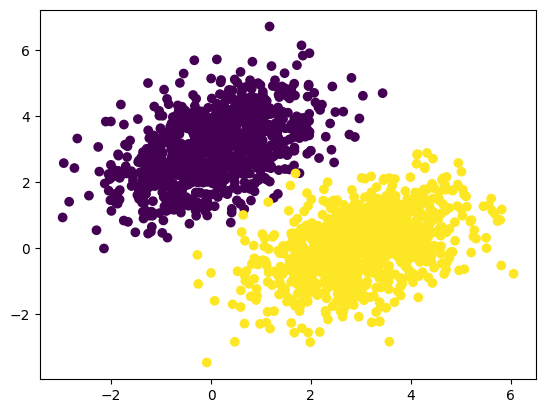

In [4]:
import numpy as np
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class, 1), dtype="float32")))
#print(inputs.shape, targets.shape)

import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

Loss at step 0: 0.8039
Loss at step 10: 0.0544
Loss at step 20: 0.0385
Loss at step 30: 0.0319
Final loss after 40: 0.0293


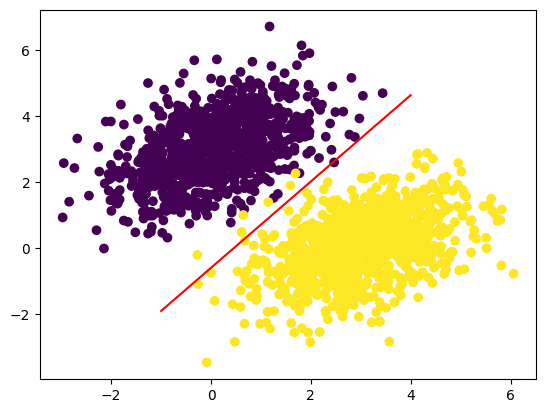

In [11]:
import tensorflow as tf
input_dim = 2
output_dim = 1
W = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def model(inputs):
  return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  dW, db = tape.gradient(loss, [W, b])
  W.assign_sub(learning_rate * dW)
  b.assign_sub(learning_rate * db)
  return loss

training_steps = 40

for step in range(training_steps):
  loss = training_step(inputs, targets)
  if step % 10 == 0:
    print(f"Loss at step {step}: {loss:.4f}")
print(f"Final loss after {training_steps}: {loss:.4f}")


predictions = model(inputs)
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
#plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()